In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
data_dp = Path("../data/")

# Get people information

In [3]:
people_df = pd.read_csv(data_dp / Path("people.csv"), index_col=0)

In [4]:
people_df

,city,country,first-name,last-name,pronouns,country-alpha_3,continent,longitude,latitude,ols-1-role,...,ols-6-facilitator,ols-6-organizer,ols-7-role,ols-7-participant,ols-7-mentor,ols-7-expert,ols-7-speaker,ols-7-facilitator,ols-7-organizer,mastodon
0sahene,Tamale,Ghana,Sitsofe,Morgah,He,GHA,Africa,-0.842399,9.405199,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x174,Boston,United States,William,Jackson,He/Him,USA,North America,-71.060511,42.355433,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4iro,"Rancagua, Provincia De Buenos Aires",Argentina,Irene,Vazano,She/her/hers,ARG,South America,-60.504583,-34.029963,NaN,...,NaN,NaN,participant,"Mapping open-science communities, organization...",NaN,NaN,NaN,NaN,NaN,NaN
abdulelahsm,Dammam,Saudi Arabia,Abdulelah,Al Mesfer,he/him,SAU,Asia,50.103999,26.436782,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abraham-dabengwa,Johannesburg,South Africa,Abraham,Dabengwa,he/ him,ZAF,Africa,28.049722,-26.205000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rhoné-roux,NaN,NaN,Rhoné,Roux,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sgsfak,NaN,NaN,Stelios,Sfakianakis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tallmar,NaN,NaN,Marta,Lloret Llinares,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
umar-farouk-ahmad,NaN,NaN,Umar Farouk,Ahmad,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cohort_nb = 8

In [6]:
roles_dp = data_dp / Path('roles')
roles_df = {}
roles = []
for r in roles_dp.iterdir():
    role = r.stem
    roles.append(role)
    roles_df[role] = pd.read_csv(r, index_col=0)

# People per roles

In [7]:
red_roles = ['participant', 'mentor', 'facilitator', 'speaker', 'expert']
role_count_df = pd.DataFrame(columns = red_roles)
for r in red_roles:
    role_count_df[r] = (roles_df[r]
        .drop(columns = ['city','country','country-alpha_3','first-name','last-name','pronouns','continent','longitude','latitude'])
        .count(axis=0))
role_count_df

,participant,mentor,facilitator,speaker,expert
ols-1,29,20,0,18,37
ols-2,52,36,0,26,65
ols-3,66,34,1,18,63
ols-4,34,32,7,14,46
ols-5,71,35,5,13,26
ols-6,41,32,7,17,39
ols-7,49,32,10,5,4


Add project counts!!!

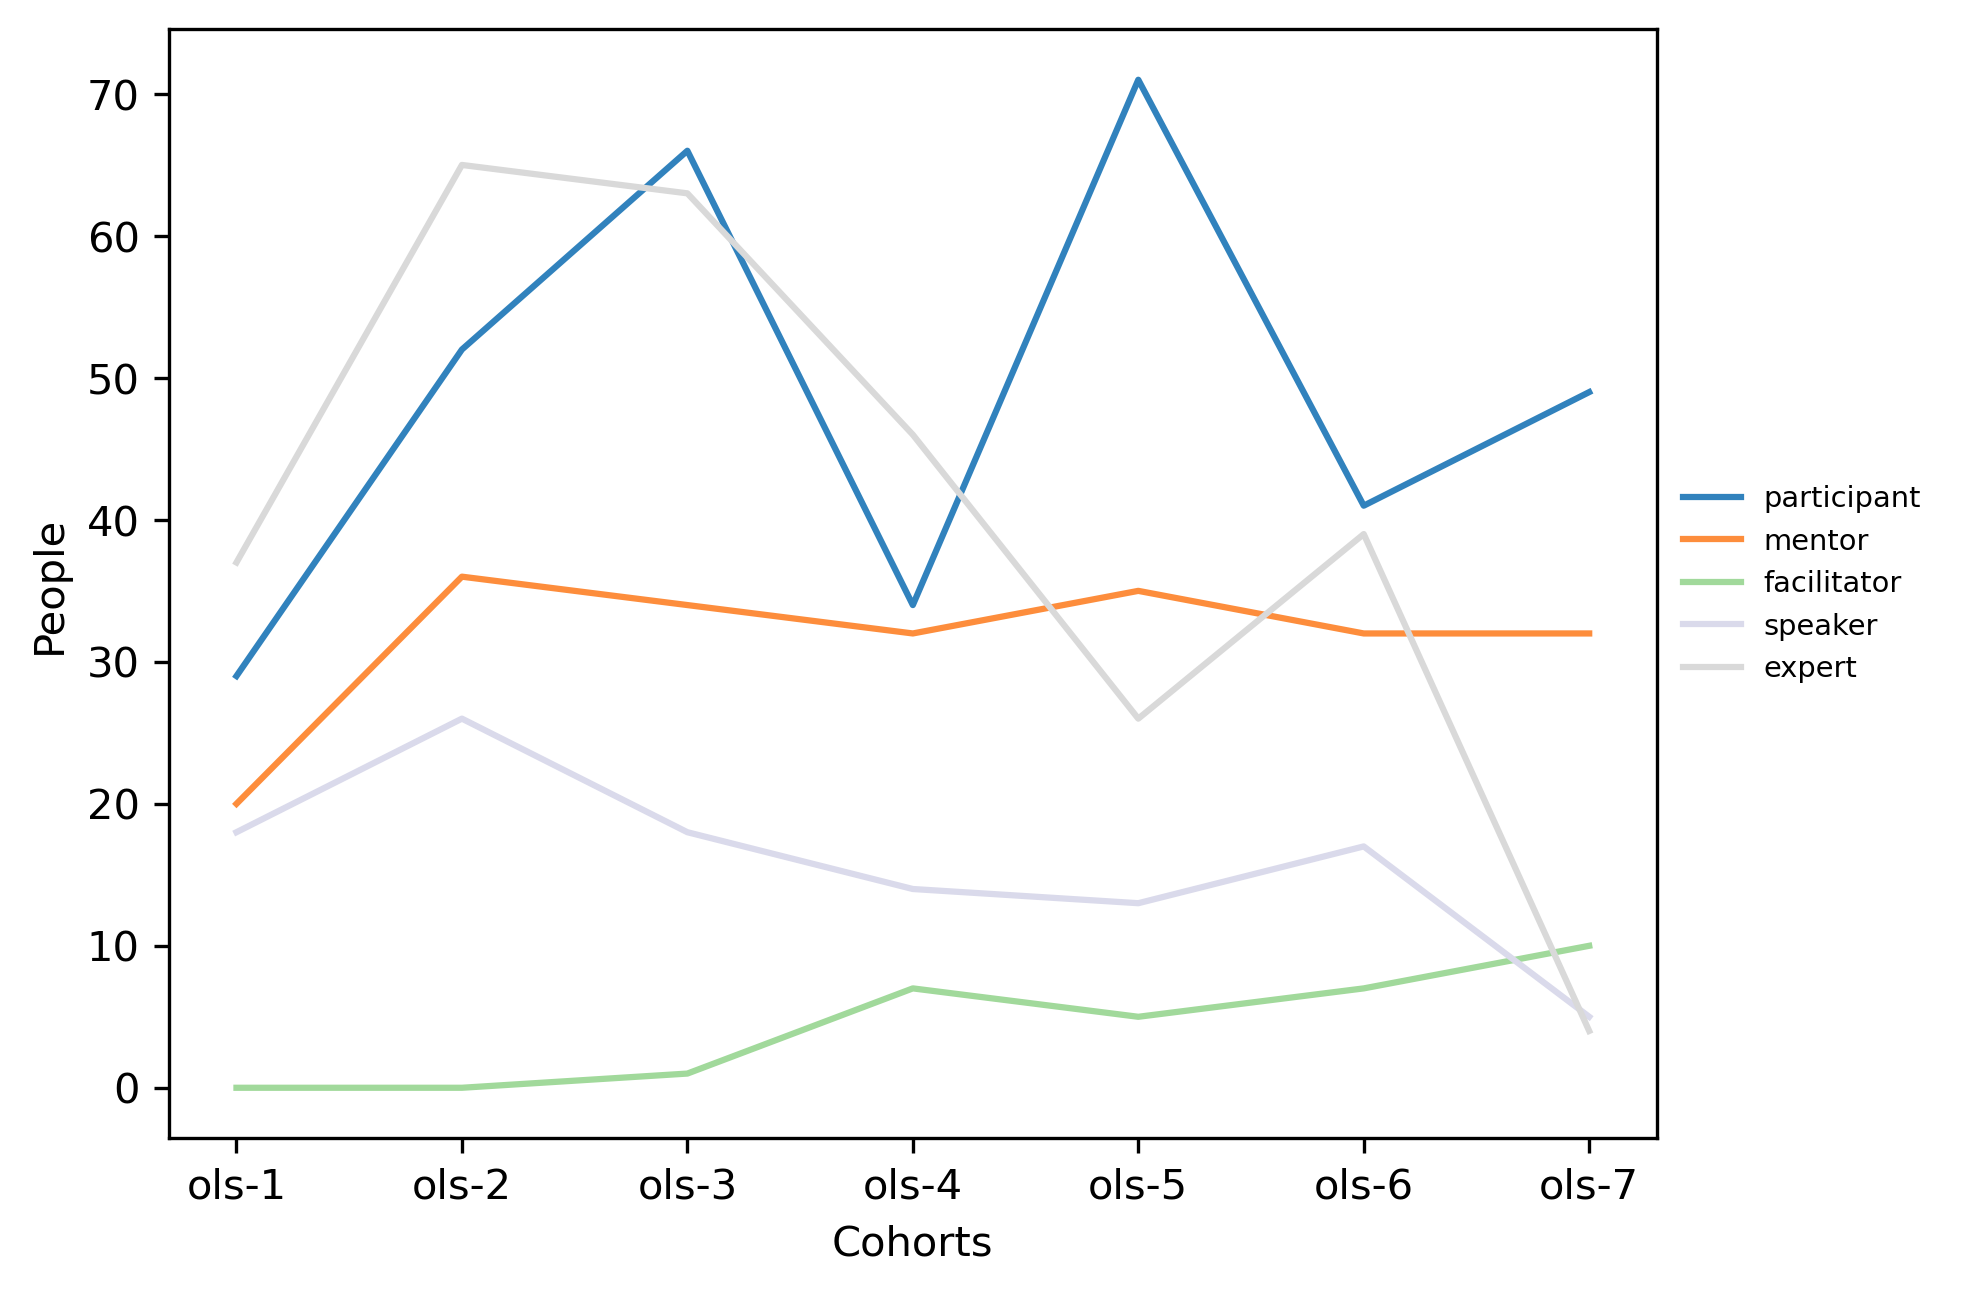

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_count_df
     .plot(ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('People')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')

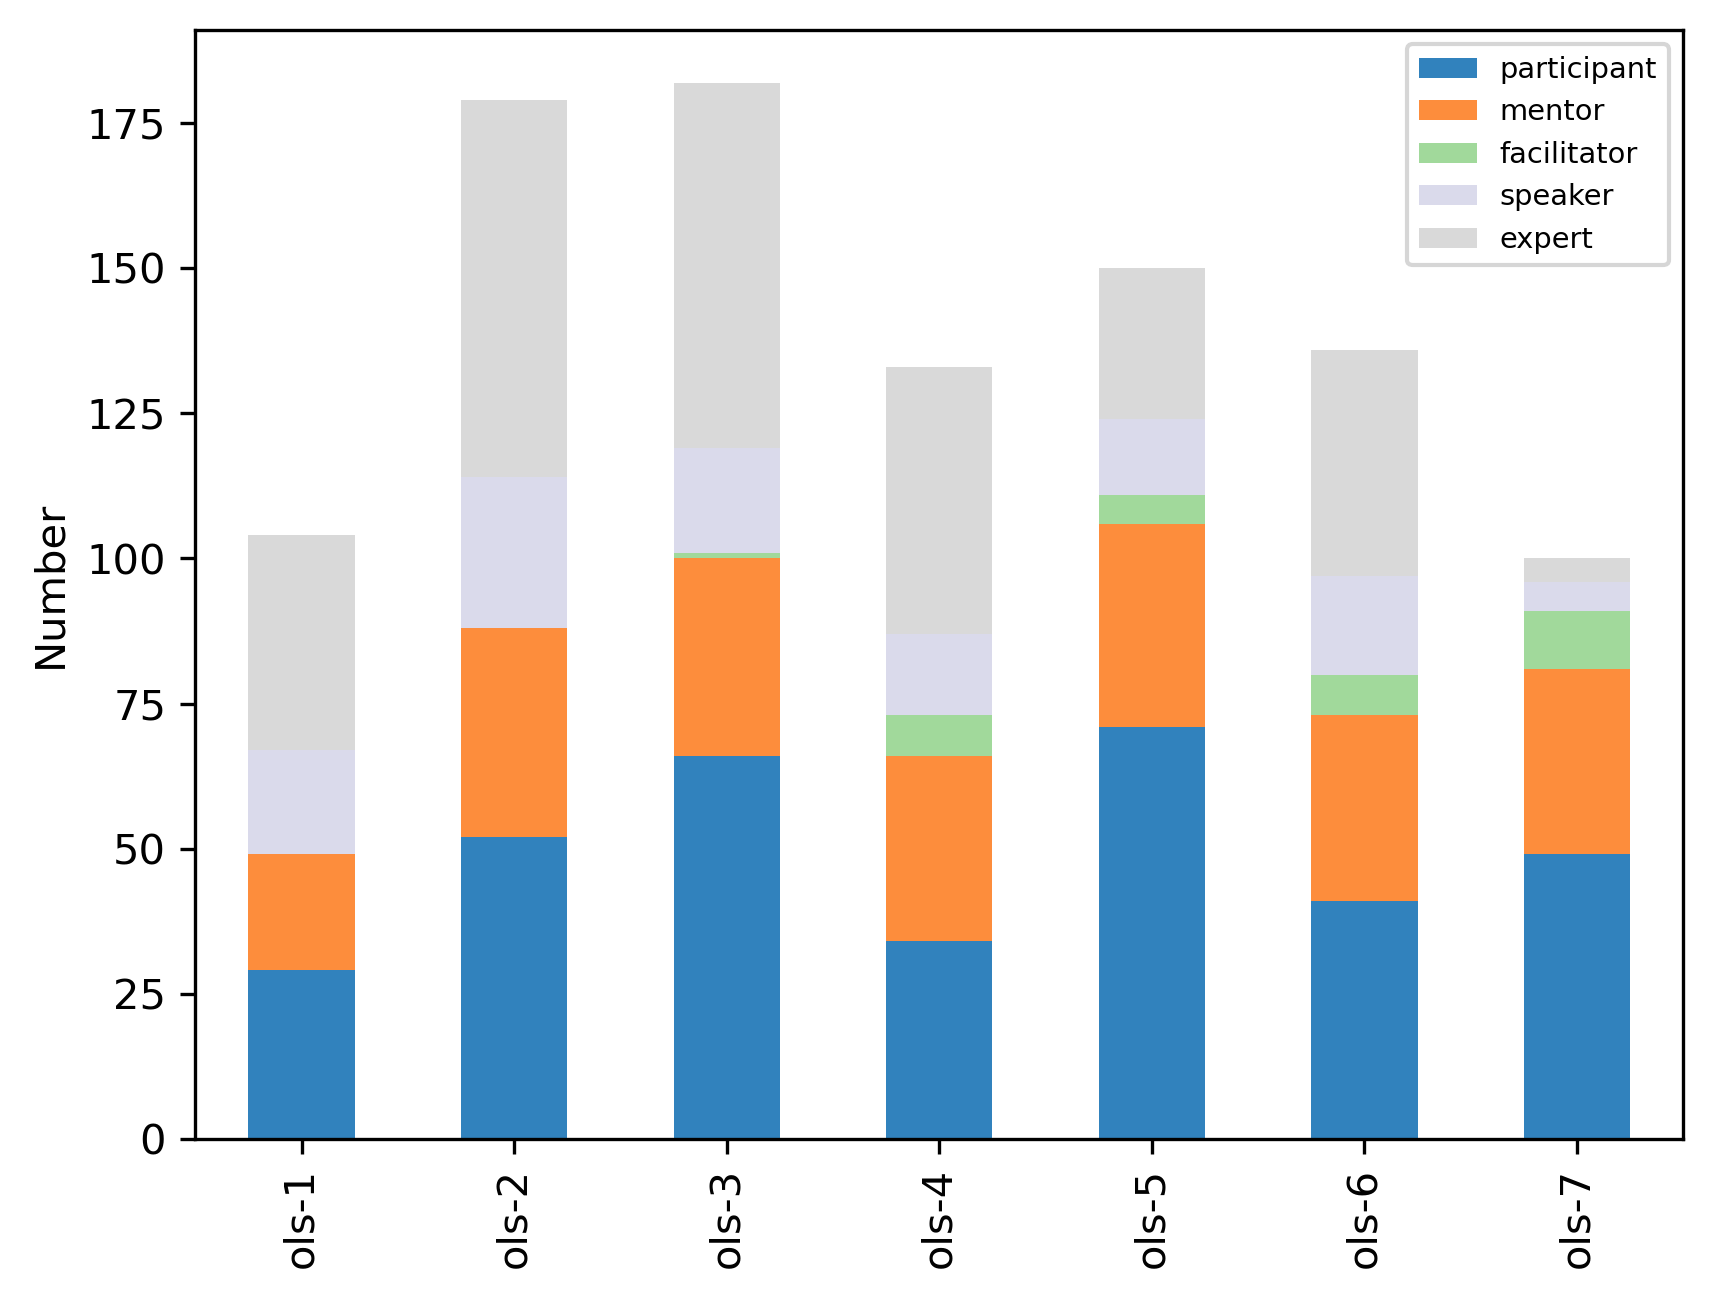

In [20]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(role_count_df
     .plot.bar(ax=ax, colormap='tab20c', stacked=True))
#plt.xlabel('Cohorts')
plt.ylabel('Number')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

# Role transfer

In [29]:
all_participants = list(roles_df['participant'].index)
len(set(all_participants))

315

In [28]:
def get_interestion(part, other_role):
    intersect = set(part) & set(other_role)
    print(len(intersect))
    print(100*len(intersect)/len(part))
    
all_roles = []
for r in ['mentor', 'facilitator', 'speaker', 'expert']:
    print(f"Participants to {r}")
    l = list(roles_df[r].index)
    get_interestion(all_participants, l)
    all_roles += l
print(f"Participants to any role")
get_interestion(all_participants, all_roles)

Participants to mentor
53
16.825396825396826
Participants to facilitator
17
5.396825396825397
Participants to speaker
13
4.126984126984127
Participants to expert
40
12.698412698412698
Participants to any role
77
24.444444444444443
